In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("시도별 전출입 인구수.xlsx", engine='openpyxl', header=0)

In [3]:
# NaN값을 바로 앞의 행 데이터값으로 채운다.
df = df.fillna(method = 'ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1,inplace=True)
df_seoul.set_index('전입지',inplace=True) # 행 인덱스로 지정

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

In [5]:
# 한글 폰트 오류 해결
from matplotlib import font_manager, rc
font_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

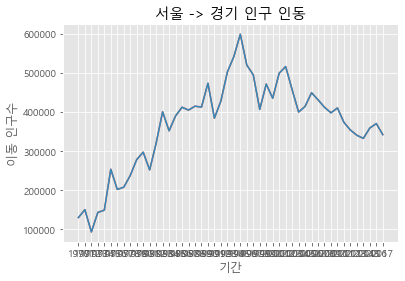

In [6]:
# plot
plt.plot(sr_one.index, sr_one.values)

# 판다스 객체를 plot함수에 입력
plt.plot(sr_one)

plt.title('서울 -> 경기 인구 인동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')
plt.show()

In [8]:
# 1-2. 그래프 꾸미기
# 스타일 서식의 종류
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


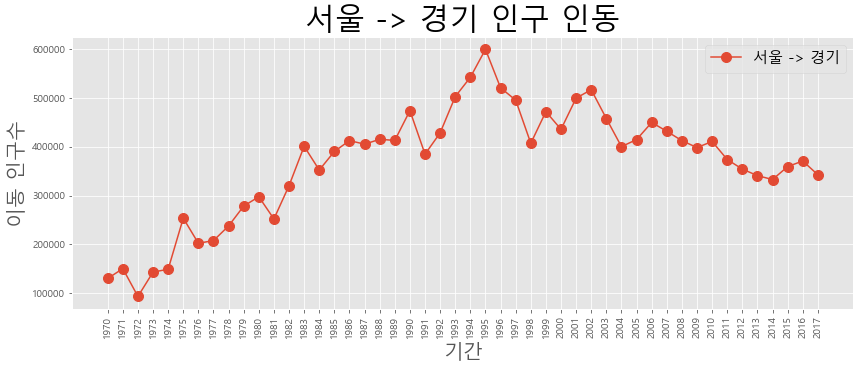

In [9]:
plt.style.use('ggplot') # 스타일 서식 지정
plt.figure(figsize=(14,5)) # 그림 사이즈 지정
plt.xticks(size = 10, rotation = 'vertical') # x축 눈금 라벨 회전
plt.plot(sr_one, marker='o',markersize = 10) # 마커 표시 추가
plt.title('서울 -> 경기 인구 인동',size=30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)
plt.legend(labels=['서울 -> 경기'], loc='best', fontsize = 15)
plt.show()

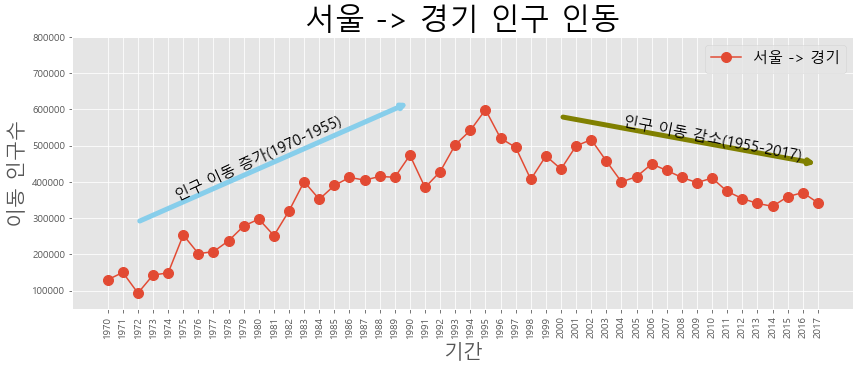

In [11]:
plt.style.use('ggplot') # 스타일 서식 지정
plt.figure(figsize=(14,5)) # 그림 사이즈 지정
plt.xticks(size = 10, rotation = 'vertical') # x축 눈금 라벨 회전
plt.plot(sr_one, marker='o',markersize = 10) # 마커 표시 추가
plt.title('서울 -> 경기 인구 인동',size=30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)
plt.legend(labels=['서울 -> 경기'], loc='best', fontsize = 15)

# 주석 표시 - 화살표
plt.ylim(50000,800000) # y축 범위 지정
plt.annotate('',
             xy = (20,620000),   # 화살표 끝점
             xytext = (2,290000),# 화살표 시작점
             xycoords = 'data',  # 좌표체
             arrowprops=dict(arrowstyle='->', color='skyblue',lw=5)
             )

plt.annotate('',
             xy = (47,450000),   
             xytext = (30,580000),
             xycoords = 'data',  
             arrowprops=dict(arrowstyle='->', color='olive',lw=5)
             )

# 주석 표시 - 텍스트
plt.annotate('인구 이동 증가(1970-1955)',
             xy = (10,350000),   
             rotation = 25,
             va = 'baseline',
             ha = 'center',
             fontsize=15
             )

plt.annotate('인구 이동 감소(1955-2017)',
             xy = (40,460000),   
             rotation = -11,
             va = 'baseline',
             ha = 'center',
             fontsize=15
             )

plt.show()

<ipython-input-13-5e8e85990e46>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index, rotation=75)
<ipython-input-13-5e8e85990e46>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_one.index, rotation=75)


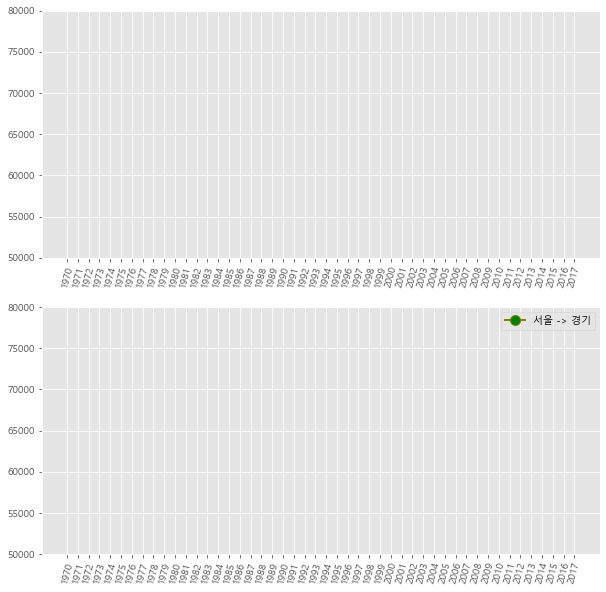

In [13]:
# 화면 분할하여 그래프 여러 개 그리기
# aex 객체

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(sr_one, 'o', markersize=10)
ax2.plot(sr_one, marker = 'o', markerfacecolor='green',markersize=10,
         color='olive',linewidth=2,label='서울 -> 경기')
ax2.legend(loc='best')

ax1.set_ylim(50000,80000)
ax2.set_ylim(50000,80000)

ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=75)

plt.show()